$$ \Huge { Linear ~ Regression }$$
$$ Binh ~ Tran $$

# Explore Data 

## Import some packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

## Load the diabetes dataset

In [2]:
diabetes = datasets.load_diabetes()

In [3]:
print(diabetes.DESCR)

Diabetes dataset

Notes
-----

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

Data Set Characteristics:

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attributes:
    :Age:
    :Sex:
    :Body mass index:
    :Average blood pressure:
    :S1:
    :S2:
    :S3:
    :S4:
    :S5:
    :S6:

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani

For more about [Body mass index](http://www.thehinh.com/2016/02/chi-so-bmi-la-gi-cong-cu-tinh-bmi.html)

## All features

In [18]:
import pandas as pd
df = pd.DataFrame(diabetes.data, 
             columns=[':Age:',':Sex:',':Body mass index:',':Average blood pressure:',
                      ':S1:',':S2:',':S3:',':S4:',':S5:',':S6:'])

In [24]:
display(df[:5])

:Age:     :Sex:  :Body mass index:  :Average blood pressure:      :S1:  \
0  0.038076  0.050680           0.061696                  0.021872 -0.044223   
1 -0.001882 -0.044642          -0.051474                 -0.026328 -0.008449   
2  0.085299  0.050680           0.044451                 -0.005671 -0.045599   
3 -0.089063 -0.044642          -0.011595                 -0.036656  0.012191   
4  0.005383 -0.044642          -0.036385                  0.021872  0.003935   

       :S2:      :S3:      :S4:      :S5:      :S6:  
0 -0.034821 -0.043401 -0.002592  0.019908 -0.017646  
1 -0.019163  0.074412 -0.039493 -0.068330 -0.092204  
2 -0.034194 -0.032356 -0.002592  0.002864 -0.025930  
3  0.024991 -0.036038  0.034309  0.022692 -0.009362  
4  0.015596  0.008142 -0.002592 -0.031991 -0.046641

## Label

In [31]:
labels = diabetes.target
pd.DataFrame(labels[:5, np.newaxis], columns=['label'])

label
0  151.0
1   75.0
2  141.0
3  206.0
4  135.0

## Use only one feature - Body mass index

In [32]:
diabetes_X = diabetes.data[:, np.newaxis, 2]
pd.DataFrame(diabetes_X)[:5]

0
0  0.061696
1 -0.051474
2  0.044451
3 -0.011595
4 -0.036385

## Split the data into training/testing sets

In [9]:
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

## Split the targets into training/testing sets

In [10]:
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Build model & predict

## Create linear regression object

In [33]:
regr = linear_model.LinearRegression()

## Train the model using the training sets

In [34]:
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Make predictions using the testing set


In [35]:
diabetes_y_pred = regr.predict(diabetes_X_test)

## Print results

In [38]:
# The coefficients
print('Coefficients: ', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))


Coefficients:  [938.23786125]
Mean squared error: 2548.07
Variance score: 0.47


## Plot outputs

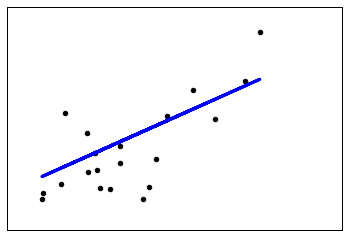

In [39]:
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()